参考：

* [進擊的 BERT：NLP 界的巨人之力與遷移學習](https://leemeng.tw/attack_on_bert_transfer_learning_in_nlp.html)



## help function

In [ ]:
def list2Str(words):
  Text = ' '.join([str(elem) for elem in words])
  return Text

In [ ]:
def remove_stop_words(file_name,seg_list):
  with open(file_name,'r') as f:
    stop_words = f.readlines()
  stop_words = [stop_word.rstrip() for stop_word in stop_words]
  new_list = []
  
  for seg in seg_list:
    if seg not in stop_words:
      new_list.append(seg)
  return new_list

## load .csv files
对[八爪鱼采集器](https://www.bazhuayu.com)在[微博](https://weibo.com)爬取关键词得到的信息进行整理

文件链接：[百度网盘 psw: 8jub](https://pan.baidu.com/s/1uQdFTXZKOuxBdAGyhv-1DQ) 
[Google Drive](https://drive.google.com/drive/folders/1gk1HDJJ04Uh9-p4B0qBvKowLh_3JA7KG?usp=sharing)

In [ ]:
import os
import pandas as pd
import pandas as pd
import glob
import os

# setting the path for joining multiple files
files = os.path.join("/content/drive/MyDrive/NLP/data", "*.csv")

# list of merged files returned
files = glob.glob(files)

#print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
df1 = pd.concat(map(pd.read_csv, files), ignore_index=True)

In [ ]:
print("微博条数："+str(len(df1)))

微博条数：8764


In [ ]:
df_train = df1["博文"]

In [ ]:
df_train[0]

'\n                    【下一秒全体笑场！ 16岁女生当防疫志愿者查到自己家 一本正经问妈妈家里有几个人】#16岁女生当防疫志愿者与妈妈一本正经对话#3月26日，上海。16岁女孩当防疫志愿者，查到自己家时，与妈妈对话假装不认识，下一秒俩人全都笑喷。女生妈妈王女士介绍，听到敲门声就猜到是女儿，女儿从小经常参加公 \u200b  展开c'

## seg word
利用jieba分词，进行分词和词频统计，进行信息熵的计算

In [ ]:
contextTxt = ''
for item in df_train:
  contextTxt = contextTxt + str(item)

In [ ]:
print("总字数："+str(len(contextTxt)))

总字数：1067518


In [ ]:
import jieba
import jieba.analyse

In [ ]:
words = jieba.lcut(contextTxt)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.001 seconds.
Prefix dict has been built successfully.


In [ ]:
words

### 进行清理

In [ ]:
file_name = '/content/drive/MyDrive/NLP/cn_stopwords.txt'
seg_list = remove_stop_words(file_name,words)

In [ ]:
import re
to_remove = [' ', '\n','\'','【','】','\u200b','c']
p = re.compile('|'.join(map(re.escape, to_remove))) # escape to handle metachars
seg_list_clean = [p.sub('', s) for s in seg_list]
seg_list_clean = [i for i in seg_list_clean if i != '']
seg_list_clean = [i for i in seg_list_clean if i != '#']

In [ ]:
seg_str = list2Str(seg_list_clean)

In [ ]:
seg_str

'一秒 笑 场 16 岁 女生 防疫 志愿者 查 家 一本正经 问 妈妈 家里 几个 16 岁 女生 防疫 志愿者 妈妈 一本正经 对话 月 26 日 上海 16 岁 女孩 防疫 志愿者 查 家时 妈妈 对话 假装 认识 一秒 俩 全都 笑 喷 女生 妈妈 王女士 介绍 听到 敲门声 猜 女儿 女儿 从小 经常 参加 公 展开 年仅 七岁 小朋友 独自 宾馆 隔离 孩子 捂住 面罩 时 破防 长春 宽城 防疫 吉林 新增 1086 例 本土 确诊 L 媒体 张晓磊 微博 视频 上海 宣布 严肃 追责 防疫 不力 人员 L 上帝 之鹰 5zn 微博 视频 想不到 尉迟 贞 武 出新 灵魂 家中 防疫 解个 闷 国风 郑爽 隋唐演义 尉迟 贞 玩转 视频 道具 北京 L 郑爽 Angel 微博 视频 女生 公交 摘 口罩 喝水 遭 司机 辱骂 建议 标题 改成 👉 🏻 女生 公交车 摘 口罩 喝水 遭 司机 辱骂 殴打 致其 住院 标题 不能不要 模糊 重点 防疫 防疫 弄 成 辱骂 殴打 地步 女生 之前 摘 口罩 喝水 错误 提醒 动手动脚 这位 司机 没有 儿女 儿女 他会 展开 右边 新 防疫 抗疫 系列 手段 其实 国家 准备 媒体 突然 加大 炒作 恐慌 力度 散布 恐慌 情绪 忽略 即将 登场 东西 毛 不想 新 手段 实施 到位 永春 茶馆 疫苗 中药 西药 自测 盒 居家 隔离 行程 码 重新 设计 新冠 治疗 下沉 社区 医院 广东 高校 清明 假期 安排 广东 高校 解封 疫情 广东 高校 防疫 举措 老师 出市 玩 批评 学生 想 出去 拿个 快递 不行 说 佛 * * 感謝眾 多義工 支援 這次 物資 包裝 行動 流水 線 工作 枯燥 看到 眾人樂此 疲 齊心 合力 抗擊 疫情 為 目標 決心 相信 疫情 很快 便 緩解 \ue627 何君尧 JuniusHo 同心 携手 共抗 疫情 香港 全民 防疫 正 能量 浦东 外卖 没 信心 收回 前两天 说 上海 防疫 一塌糊涂 员工 都阳 TM 不放 想 公司 打地铺 一餐 晚餐 物资 保障 说明 玩去 上海 · 绿地 中央 广场 福建 同心 抗疫 小喇叭 循环 播放 南平 开展 拉网式 严查 督促 餐饮 单位 落实 防疫 措施 疫情 防控 期间 \xa0 南平 建阳 市场 监管局 全区 餐饮 服务

### 词频统计与信息熵计算
[参考](https://kangleizhou.github.io/nlp/2021/04/08/Chinese_entropy/)

In [ ]:
import math
def get_tf_1(words):
    tf_dic = {}
    for w in words:
        tf_dic[w] = tf_dic.get(w, 0) + 1
    return tf_dic.items()
def calculate_entropy(split_words):
    words_len = len(split_words)
    words_tf = get_tf_1(split_words) 
    entropy = [-(uni_word[1]/words_len)*math.log(uni_word[1]/words_len, 2) for uni_word in words_tf]
    entropy = round(sum(entropy), 4)
    print("信息熵是"+str(entropy))
    return words_tf

In [ ]:
words_tf = calculate_entropy(seg_list)

信息熵是8.3627


In [ ]:
temp = []
for uni_word in words_tf: 
  temp.append(uni_word)

In [ ]:
sort_wordTF = sorted(temp,key=(lambda x:x[1]))
sort_wordTF.reverse()

In [ ]:
i = 1
sum = 0
sort_list = []
sort_chart = []
for item in sort_wordTF:
  if item[0] not in [' ','核酸','清零','防控','\u200b','\n','疫情','上海','防疫','封闭','展开','管理','c','c#'] and len(item[0])>=2:
    sum = sum+item[1]
    sort_list.append([i,item[0],item[1],' '])
    sort_chart.append(item[0])
    i = i +1

for index in range(len(sort_list)):
  sort_list[index][3] = round(sort_list[index][2]/sum,4)

In [ ]:
sort_list[:100]

[[1, '没有', 1116, 0.0047],
 [2, '视频', 1110, 0.0047],
 [3, '小区', 1089, 0.0046],
 [4, '工作', 1058, 0.0045],
 [5, '确诊', 1026, 0.0044],
 [6, '新增', 1008, 0.0043],
 [7, '微博', 975, 0.0041],
 [8, '检测', 851, 0.0036],
 [9, '现在', 850, 0.0036],
 [10, '真的', 839, 0.0036],
 [11, '一个', 836, 0.0036],
 [12, '学校', 782, 0.0033],
 [13, '高校', 780, 0.0033],
 [14, '无症状', 775, 0.0033],
 [15, '新冠', 733, 0.0031],
 [16, '隔离', 729, 0.0031],
 [17, '人员', 707, 0.003],
 [18, '学生', 705, 0.003],
 [19, '物资', 671, 0.0029],
 [20, '抗疫', 654, 0.0028],
 [21, '已经', 650, 0.0028],
 [22, '今天', 632, 0.0027],
 [23, '本土', 620, 0.0026],
 [24, '生活', 571, 0.0024],
 [25, '不能', 567, 0.0024],
 [26, '社会', 542, 0.0023],
 [27, '阳性', 532, 0.0023],
 [28, '病例', 521, 0.0022],
 [29, '动态', 489, 0.0021],
 [30, '期间', 489, 0.0021],
 [31, '中国', 480, 0.002],
 [32, '希望', 475, 0.002],
 [33, '进行', 474, 0.002],
 [34, '肺炎', 469, 0.002],
 [35, '解封', 466, 0.002],
 [36, '知道', 465, 0.002],
 [37, '问题', 459, 0.002],
 [38, '情况', 459, 0.002],
 [39, '社区', 456, 0.0019]

In [ ]:
'黄色' in sort_chart

True

排名在前面的多义词：
* 通知：名词或者动词
* 生活：
* 一线：两点一线 还是 一线城市



output as csv

In [ ]:
import csv
fields = ['rank', 'string', 'count','frequency'] 
with open('/content/drive/MyDrive/NLP/Frequen-output.csv', 'w') as f:
  write = csv.writer(f)
  write.writerow(fields)
  write.writerows(sort_list)

### 词云展示

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
font_path = '/content/drive/MyDrive/NLP/FZKTK.TTF'

In [ ]:
import cv2  as cv
from google.colab.patches import cv2_imshow
pic = cv.imread('/content/drive/MyDrive/NLP/Medical-Mask.jpg')
gray = cv.cvtColor(pic, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(gray, 110, 255, cv.THRESH_BINARY_INV)

In [ ]:
stringnew = ''
for item in sort_chart[10:500]:
  stringnew = stringnew+item

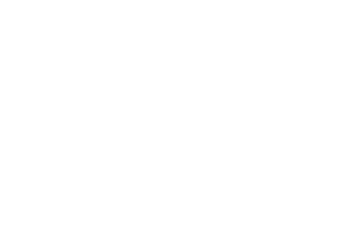

In [ ]:
import matplotlib.pyplot as plt
wc = WordCloud(
    background_color='white',
    mask=mask,
    random_state=10,
    font_path=font_path
                )
wc.generate(stringnew[15:])
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
fig_path = '/content/drive/MyDrive/NLP/data/text.png'
wc.to_file(fig_path)

In [ ]:
wc = WordCloud(
  background_color='white',        #   背景顏色
  max_words=200,                   #   最大分詞數量
  mask=None,                       #   背景圖片
  max_font_size=None,              #   顯示字體的最大值
  font_path=font_path,             #   若為中文則需引入中文字型(.TTF)
  random_state=None,               #   隨機碼生成各分詞顏色
  prefer_horizontal=0.9)           #   調整分詞中水平和垂直的比例
#chart_new=' '.join(chart_new[15:])
wc.generate(stringnew[15:])
import matplotlib.pyplot as plt
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
fig_path = '/content/drive/MyDrive/NLP/data/text2.png'
wc.to_file(fig_path)

# 一词多义训练

### 制作训练数据集
[Pandas Concatenate Two Columns](https://sparkbyexamples.com/pandas/pandas-concatenate-two-columns/)

In [ ]:
url1 = '/content/drive/MyDrive/NLP/data/封闭管理.csv'
df1 = pd.read_csv(url1)['博文']
url2 = '/content/drive/MyDrive/NLP/data/封闭管理2.csv'
df2 = pd.read_csv(url2)['博文']
url3 = '/content/drive/MyDrive/NLP/data/防疫.csv'
df3 = pd.read_csv(url3)['博文']
url4 = '/content/drive/MyDrive/NLP/data/防疫2.csv'
df4 = pd.read_csv(url4)['博文']

假设这里要对“生活”进行提取
* 学生生活区 日常生活 生活必须类 生活用品 好好生活 学生活动 工作与生活

In [ ]:
def clean_data(string,keyword,length):
  i = string.find(keyword)
  if i+length > len(string):
    end = len(string)
  else:
    end = i+length-1
  if i-length < 0:
    front = 0
  else:
    front = i-length+1
  return string[front:end]

In [ ]:
df = []
string = '生活'
for item in df1:
  if item.find(string)!=-1:   
    df.append(clean_data(item,string,8))
for item in df2:
  if item.find(string)!=-1:
    df.append(clean_data(item,string,8))
for item in df3:
  if item.find(string)!=-1:
    df.append(clean_data(item,string,8))
for item in df4:
  if item.find(string)!=-1:
    df.append(clean_data(item,string,8))

In [ ]:
df

In [ ]:
df_clean = []
for item in df:
  item = item.replace("_", "")
  item = item.replace("\\n", "")
  item = item.replace("#", "")
  item = item.replace("【", "")
  item = item.replace("】", "")
  item = item.replace("\u200b", "")
  df_clean.append(item)

In [ ]:
df_clean

In [ ]:
len(df_clean)

272

In [ ]:
df_front = df_clean[:136]
df_end= df_clean[136:]

In [ ]:
df_front = pd.DataFrame(df_front)
df_end = pd.DataFrame(df_end)

In [ ]:
df_output = pd.DataFrame()

In [ ]:
df_output['texta'] = df_front
df_output['textb'] = df_end

In [ ]:
df_output

In [ ]:
df_output.to_csv('/content/drive/MyDrive/NLP/data/生活.csv')

### 手动处理后的数据再处理

#### train.csv
read from google drive .gsheet

In [ ]:
def loadGsheet(filename):
  '''
  Parameter: just filename, not path
  return type: pandas dataframe
  '''
  from google.colab import auth
  auth.authenticate_user()

  import gspread
  from google.auth import default
  creds, _ = default()
  gc = gspread.authorize(creds) 
  worksheet = gc.open(filename).sheet1
  # get_all_values gives a list of rows.
  rows = worksheet.get_all_values()
  # Convert to a DataFrame and render.
  import pandas as pd
  df = pd.DataFrame.from_records(rows)
  del df[0]
  df = df.rename(columns={1: "texta",2: "textb",3: "label"})
  df = df.drop(labels=0, axis=0)
  return df


In [ ]:
df = loadGsheet('生活')

In [ ]:
df_train = df[:]
df_train.drop(df.columns[0], axis=1)
df_train = df_train.reset_index()
df_train = df_train.loc[:, ['texta', 'textb', 'label']]
df_train.columns = ['text_a', 'text_b', 'label']

label转换：
* 1 = same 
* 0 = dif

In [ ]:
a = df_train['label'][0]
a
for index in range(len(df_train['label'])):
  if df_train['label'][index] == a:
    df_train['label'][index] = 'same'
  else:
    df_train['label'][index] = 'dif'
    

In [ ]:
df_test = df_train[130:]
df_val = df_train[100:130]
df_train = df_train[:100]

In [ ]:
print("训练样本数：", len(df_train))
print("测试样本数：", len(df_test))
print("val样本数：", len(df_val))

训练样本数： 100
测试样本数： 21
val样本数： 30


In [ ]:
# idempotence, 將處理結果另存成 tsv 供 PyTorch 使用
df_train.to_csv("train.tsv", sep="\t", index=False)
df_test.to_csv("test.tsv", sep="\t", index=False)
df_val.to_csv("val.tsv", sep="\t", index=False)

In [ ]:
df_train

,text_a,text_b,label
0,有我们不行大学生活才四年，稍,坊人民的经济和生活带来了巨大,same
1,热，实际上大家生活并没有太多,老师都在正常的生活，只有高校,dif
2,了两年了，大学生活已经被榨干,起了自己的大学生活……30日,same
3,易被环境麻痹 生活就是这样,为啥深圳慢生活就没啥人抱,same
4,徽大学生的封校生活合肥高,徽大学生的封校生活,same
...,...,...,...
65,啡，还是幸运和生活安排合理的,商场，视察了解生活物资供应保,dif
66,里，找到诗意的生活，找到继续,青旅漫游 放肆生活 岛城,dif
67,多日没人处理！生活基本物资多,会影响正常生产生活。 但是如,dif
68,徽大学生的封校生活合肥各,步有序恢复生产生活。中国电信,dif


## bert


In [ ]:
"""
實作一個可以用來讀取訓練 / 測試集的 Dataset，這是你需要徹底了解的部分。
此 Dataset 每次將 tsv 裡的一筆成對句子轉換成 BERT 相容的格式，並回傳 3 個 tensors：
- tokens_tensor：兩個句子合併後的索引序列，包含 [CLS] 與 [SEP]
- segments_tensor：可以用來識別兩個句子界限的 binary tensor
- label_tensor：將分類標籤轉換成類別索引的 tensor, 如果是測試集則回傳 None
"""
from torch.utils.data import Dataset
import torch
import pandas as pd   
class FakeNewsDataset(Dataset):
    # 讀取前處理後的 tsv 檔並初始化一些參數
    def __init__(self, mode, tokenizer):
        assert mode in ["train", "test","val"]  # 一般訓練你會需要 dev set
        self.mode = mode
        # 大數據你會需要用 iterator=True
        self.df = pd.read_csv(mode + ".tsv", sep="\t").fillna("")
        self.len = len(self.df)
        self.label_map = {'same': 0, 'dif': 1}
        self.tokenizer = tokenizer  # 我們將使用 BERT tokenizer
    
    # 定義回傳一筆訓練 / 測試數據的函式
    def __getitem__(self, idx):
        if self.mode == "test":
            text_a, text_b = self.df.iloc[idx, :2].values
            label_tensor = None
        else:
            text_a, text_b, label = self.df.iloc[idx, :].values
            # 將 label 文字也轉換成索引方便轉換成 tensor
            label_id = self.label_map[label]
            label_tensor = torch.tensor(label_id)
            
        # 建立第一個句子的 BERT tokens 並加入分隔符號 [SEP]
        word_pieces = ["[CLS]"]
        tokens_a = self.tokenizer.tokenize(text_a)
        word_pieces += tokens_a + ["[SEP]"]
        len_a = len(word_pieces)
        
        # 第二個句子的 BERT tokens
        tokens_b = self.tokenizer.tokenize(text_b)
        word_pieces += tokens_b + ["[SEP]"]
        len_b = len(word_pieces) - len_a
        
        # 將整個 token 序列轉換成索引序列
        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)
        
        # 將第一句包含 [SEP] 的 token 位置設為 0，其他為 1 表示第二句
        segments_tensor = torch.tensor([0] * len_a + [1] * len_b, 
                                        dtype=torch.long)
        
        return (tokens_tensor, segments_tensor, label_tensor)
    
    def __len__(self):
        return self.len


In [ ]:
!pip install transformers
!pip install bertviz

In [ ]:
from transformers import BertTokenizer, BertModel
from bertviz import head_view

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_version = 'bert-base-chinese'
model = BertModel.from_pretrained(model_version, output_attentions=True)
tokenizer = BertTokenizer.from_pretrained(model_version)

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/393M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

In [ ]:
trainset = FakeNewsDataset("train", tokenizer=tokenizer)
valset = FakeNewsDataset("val", tokenizer=tokenizer)

In [ ]:
"""
實作可以一次回傳一個 mini-batch 的 DataLoader
這個 DataLoader 吃我們上面定義的 `FakeNewsDataset`，
回傳訓練 BERT 時會需要的 4 個 tensors：
- tokens_tensors  : (batch_size, max_seq_len_in_batch)
- segments_tensors: (batch_size, max_seq_len_in_batch)
- masks_tensors   : (batch_size, max_seq_len_in_batch)
- label_ids       : (batch_size)
"""

from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

# 這個函式的輸入 `samples` 是一個 list，裡頭的每個 element 都是
# 剛剛定義的 `FakeNewsDataset` 回傳的一個樣本，每個樣本都包含 3 tensors：
# - tokens_tensor
# - segments_tensor
# - label_tensor
# 它會對前兩個 tensors 作 zero padding，並產生前面說明過的 masks_tensors
def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]
    
    # 測試集有 labels
    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples])
    else:
        label_ids = None
    
    # zero pad 到同一序列長度
    tokens_tensors = pad_sequence(tokens_tensors, 
                                  batch_first=True)
    segments_tensors = pad_sequence(segments_tensors, 
                                    batch_first=True)
    
    # attention masks，將 tokens_tensors 裡頭不為 zero padding
    # 的位置設為 1 讓 BERT 只關注這些位置的 tokens
    masks_tensors = torch.zeros(tokens_tensors.shape, 
                                dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(
        tokens_tensors != 0, 1)
    
    return tokens_tensors, segments_tensors, masks_tensors, label_ids


# 初始化一個每次回傳 64 個訓練樣本的 DataLoader
# 利用 `collate_fn` 將 list of samples 合併成一個 mini-batch 是關鍵

In [ ]:
BATCH_SIZE = 256
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, 
                         collate_fn=create_mini_batch)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, 
                         collate_fn=create_mini_batch)

In [ ]:
# 載入一個可以做中文多分類任務的模型，n_class = 2
from transformers import BertForSequenceClassification

PRETRAINED_MODEL_NAME = "bert-base-chinese"
NUM_LABELS = 2

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, 
    num_labels=NUM_LABELS)

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
model.config

BertConfig {
  "_name_or_path": "bert-base-chinese",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.17.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 21128
}

In [ ]:
def get_predictions(model, dataloader, compute_acc=False):
    predictions = None
    correct = 0
    total = 0
      
    with torch.no_grad():
        # 遍巡整個資料集
        for data in dataloader:
            # 將所有 tensors 移到 GPU 上
            if next(model.parameters()).is_cuda:
                data = [t.to("cuda:0") for t in data if t is not None]
            
            
            # 別忘記前 3 個 tensors 分別為 tokens, segments 以及 masks
            # 且強烈建議在將這些 tensors 丟入 `model` 時指定對應的參數名稱
            tokens_tensors, segments_tensors, masks_tensors = data[:3]
            outputs = model(input_ids=tokens_tensors, 
                            token_type_ids=segments_tensors, 
                            attention_mask=masks_tensors)
            
            logits = outputs[0]
            _, pred = torch.max(logits.data, 1)
            
            # 用來計算訓練集的分類準確率
            if compute_acc:
                labels = data[3]
                total += labels.size(0)
                correct += (pred == labels).sum().item()
                
            # 將當前 batch 記錄下來
            if predictions is None:
                predictions = pred
            else:
                predictions = torch.cat((predictions, pred))
    
    if compute_acc:
        acc = correct / total
        return predictions, acc
    return predictions


In [ ]:
# 讓模型跑在 GPU 上並取得訓練集的分類準確率
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)
model = model.to(device)
_, acc = get_predictions(model, trainloader, compute_acc=True)
print("classification acc:", acc)

device: cuda:0
classification acc: 0.5142857142857142


In [ ]:
import numpy as np
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
# 訓練模式
import random
from transformers import get_linear_schedule_with_warmup
seed_val = 25
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
model.train()

# 使用 Adam Optim 更新整個分類模型的參數
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)


EPOCHS = 20
total_steps = len(trainloader) * EPOCHS

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)


print("---train")
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    for data in trainloader:
        
        tokens_tensors, segments_tensors, \
        masks_tensors, labels = [t.to(device) for t in data]
        optimizer.zero_grad()
        model.zero_grad()
        outputs = model(input_ids=tokens_tensors, 
                        token_type_ids=segments_tensors, 
                        attention_mask=masks_tensors, 
                        labels=labels)

        loss = outputs[0]
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        running_loss += loss.item()
        
    
    _, acc = get_predictions(model, trainloader, compute_acc=True)

    print('[epoch %d] loss: %.3f, acc: %.3f' %
          (epoch + 1, running_loss, acc))
    
    # val:

    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    model.eval()
    with torch.no_grad():
      for data in valloader:     
        tokens_tensors, segments_tensors, \
        masks_tensors, labels = [t.to(device) for t in data]
        optimizer.zero_grad()
        outputs = model(input_ids=tokens_tensors, 
                          token_type_ids=segments_tensors, 
                          attention_mask=masks_tensors)
        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1
      print("[val.   ] Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))  
    model.train()
      

    
    #print("  Validation took: {:}".format(format_time(time.time() - t0)))

---train
[epoch 1] loss: 0.431, acc: 0.890
[val.   ] Accuracy: 0.37
[epoch 2] loss: 0.372, acc: 0.920
[val.   ] Accuracy: 0.40
[epoch 3] loss: 0.249, acc: 0.940
[val.   ] Accuracy: 0.47
[epoch 4] loss: 0.189, acc: 0.940
[val.   ] Accuracy: 0.47
[epoch 5] loss: 0.153, acc: 0.940
[val.   ] Accuracy: 0.43
[epoch 6] loss: 0.142, acc: 0.970
[val.   ] Accuracy: 0.43
[epoch 7] loss: 0.110, acc: 0.980
[val.   ] Accuracy: 0.43
[epoch 8] loss: 0.085, acc: 0.980
[val.   ] Accuracy: 0.43
[epoch 9] loss: 0.087, acc: 0.990
[val.   ] Accuracy: 0.43
[epoch 10] loss: 0.075, acc: 0.990
[val.   ] Accuracy: 0.43
[epoch 11] loss: 0.064, acc: 0.990
[val.   ] Accuracy: 0.47
[epoch 12] loss: 0.060, acc: 0.990
[val.   ] Accuracy: 0.47
[epoch 13] loss: 0.048, acc: 0.990
[val.   ] Accuracy: 0.47
[epoch 14] loss: 0.056, acc: 1.000
[val.   ] Accuracy: 0.47
[epoch 15] loss: 0.047, acc: 1.000
[val.   ] Accuracy: 0.47
[epoch 16] loss: 0.034, acc: 1.000
[val.   ] Accuracy: 0.47
[epoch 17] loss: 0.036, acc: 1.000
[val.

In [ ]:
testset = FakeNewsDataset("test", tokenizer=tokenizer)
testloader = DataLoader(testset, batch_size=256, 
                        collate_fn=create_mini_batch)
model.eval()
predictions = get_predictions(model, testloader)
index_map = {v: k for k, v in testset.label_map.items()}
df = pd.DataFrame({"Category": predictions.tolist()})
df['Category'] = df.Category.apply(lambda x: index_map[x])
df_pred = pd.concat([testset.df.loc[:, ["label"]], 
                          df.loc[:, 'Category']], axis=1)
i = 0
for index in range(len(df_pred)):
  if df_pred['label'][index] == df_pred['Category'][index]:
    i=i+1
print("准确率"+str(i/len(df_pred)))

准确率0.8571428571428571


In [ ]:
df_pred_out = pd.concat([testset.df.loc[:,], 
                          df_pred.loc[:,'Category']], axis=1)

In [ ]:
df_pred_out

,text_a,text_b,label,Category
0,乱了人们正常的生活秩序，疫情,做好抗疫物资、生活物资和重点,same,same
1,封闭”管理期间生活如此多“焦,康，绿色环保的生活吧～爱国,same,dif
2,徽大学生的封校生活 合肥,成都生活疫情,same,same
3,第二十天 接受生活的不确定,月甚至一个月的生活费，打市长,dif,dif
4,，除了买菜之类生活必需品场所,更加热爱，我为生活在这样一个,dif,dif
5,乱了泉州人民的生活节奏。如何,不容易都是为了生活…”\n“多,dif,dif
6,想要正常的生活,生活还要继续,same,same
7,生活你好,再见生活,same,dif
8,学生活动区域,生活节奏,dif,same
9,没存款的人要怎么生活？,我的生活好惨,dif,dif


### visiualize

In [ ]:
from bertviz import head_view

# 在 jupyter notebook 裡頭顯示 visualzation 的 helper
def call_html():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              "d3": "https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.8/d3.min",
              jquery: '//ajax.googleapis.com/ajax/libs/jquery/2.0.0/jquery.min',
            },
          });
        </script>
        '''))


In [ ]:
model_version = 'bert-base-chinese'
finetuned_model  = BertModel.from_pretrained(model_version, 
                                  output_attentions=True, state_dict=model.state_dict())

In [ ]:
# 選擇第一個樣本
sample_idx = 0

# 將原始文本拿出做比較
text_a, text_b, label = trainset.df.iloc[sample_idx].values

# 利用剛剛建立的 Dataset 取出轉換後的 id tensors
tokens_tensor, segments_tensor, label_tensor = trainset[sample_idx]

# 將 tokens_tensor 還原成文本
tokens = tokenizer.convert_ids_to_tokens(tokens_tensor.tolist())
combined_text = "".join(tokens)

# 渲染前後差異，毫無反應就是個 print。可以直接看輸出結果
print(f"""[原始文本]
句子 1：{text_a}
句子 2：{text_b}
分類  ：{label}

--------------------

[Dataset 回傳的 tensors]
tokens_tensor  ：{tokens_tensor}

segments_tensor：{segments_tensor}

label_tensor   ：{label_tensor}

--------------------

[還原 tokens_tensors]
{combined_text}
""")

[原始文本]
句子 1：有我们不行大学生活才四年，稍
句子 2：坊人民的经济和生活带来了巨大
分類  ：same

--------------------

[Dataset 回傳的 tensors]
tokens_tensor  ：tensor([ 101, 3300, 2769,  812,  679, 6121, 1920, 2110, 4495, 3833, 2798, 1724,
        2399, 8024, 4924,  102, 1773,  782, 3696, 4638, 5307, 3845, 1469, 4495,
        3833, 2372, 3341,  749, 2342, 1920,  102])

segments_tensor：tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1])

label_tensor   ：0

--------------------

[還原 tokens_tensors]
[CLS]有我们不行大学生活才四年，稍[SEP]坊人民的经济和生活带来了巨大[SEP]



In [ ]:
# 兩個句子
sentence_a = "正常的生活"
sentence_b = "放肆生活"

# 得到 tokens 後丟入 BERT 取得 attention
inputs = tokenizer.encode_plus(sentence_a, sentence_b, return_tensors='pt', add_special_tokens=True)
token_type_ids = inputs['token_type_ids']
input_ids = inputs['input_ids']
attention = finetuned_model(input_ids, token_type_ids=token_type_ids)[-1]
input_id_list = input_ids[0].tolist() # Batch index 0
tokens = tokenizer.convert_ids_to_tokens(input_id_list)
call_html()
head_view(attention, tokens)

<IPython.core.display.Javascript object>